In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  #importing basic things
from math import sqrt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf  #autocorrelation function plot autocorrelation is basically our signal and our signal with a time lag and ur place these signals on top of one another

In [3]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [4]:
from statsmodels.tsa.arima_model import ARIMA #arima model

In [5]:
df1 = pd.read_csv('Demand Forecast - DAIRY train.csv', parse_dates=True, index_col=[0])  #very imp setting date as index
df1.head()

,DEMAND
DATE,
2019-07-01,1200
2019-07-02,1100
2019-07-03,1200
2019-07-04,1500
2019-07-05,1000


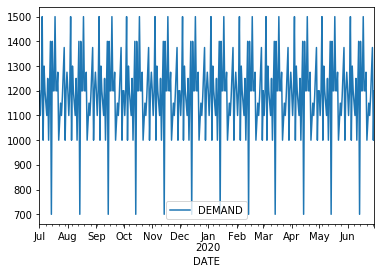

In [6]:
df1.plot()
plt.show()

In [7]:
demand_diff = df1.diff(periods=30)

In [8]:
demand_diff = demand_diff[30:]
demand_diff.head()

,DEMAND
DATE,
2019-07-31,75.0
2019-08-01,100.0
2019-08-02,-100.0
2019-08-03,-300.0
2019-08-04,500.0


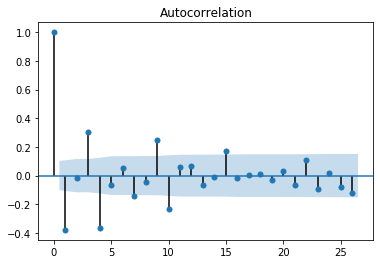

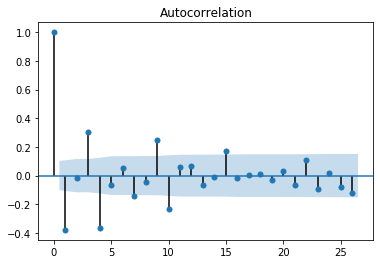

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.values)

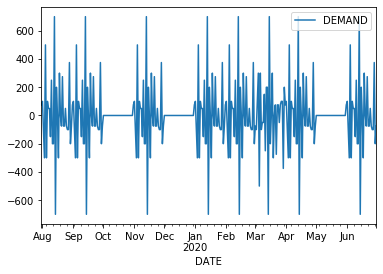

In [10]:
demand_diff.plot()

In [11]:
X1=df1.values
train1 = X1[0:336]
test1 = X1[336:]

In [12]:
train1.shape

(336, 1)

In [13]:
model_arima = ARIMA(train1,order=(17,1,1))

In [14]:
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

4114.399446969001


In [24]:
y_pred1 = model_arima_fit.forecast(steps=366)[0].tolist()

In [25]:
y_pred1

[1047.8637964915465,
 1313.9673954108944,
 1241.791947068935,
 1200.9427620590561,
 1296.8327460040136,
 1148.5633731724242,
 1070.2253926507294,
 1182.0013204132733,
 1099.8108361974037,
 1124.2719072329828,
 1227.960748960953,
 1208.1111768264548,
 1220.1558027651947,
 1241.1740079095832,
 1222.6585427268942,
 1155.0688549488136,
 1230.9955175382238,
 1186.0372947678386,
 1163.477023966877,
 1232.1028687658834,
 1172.536457692454,
 1160.0133100901853,
 1185.8829076172863,
 1143.0211430065606,
 1142.2526361712328,
 1201.247032953183,
 1173.704955893961,
 1206.8550280234476,
 1238.0135423193155,
 1210.0495986327285,
 1210.491742251633,
 1210.3502164067706,
 1182.1565641373604,
 1170.0233974764096,
 1190.6020061815395,
 1162.3882257500702,
 1172.7082408738574,
 1186.797168061583,
 1167.7297631945519,
 1177.782346376436,
 1191.9137512979776,
 1182.9017241684178,
 1196.476249277221,
 1214.6643116719963,
 1198.930677072964,
 1209.7692372739803,
 1205.3370172199054,
 1185.7940674045049,
 11

In [18]:
test1


array([[1200],
       [1100],
       [1200],
       [1500],
       [1000],
       [1300],
       [1200],
       [1150],
       [1100],
       [1250],
       [1000],
       [1200],
       [1400],
       [ 700],
       [1400],
       [1200],
       [1200],
       [1500],
       [1200],
       [1200],
       [1275],
       [1000],
       [1075],
       [1150],
       [1100],
       [1175],
       [1275],
       [1375],
       [1000],
       [1200]], dtype=int64)

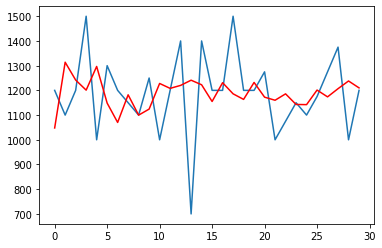

In [19]:
plt.plot(test1)
plt.plot(y_pred1 , color = 'red')

In [20]:
from sklearn.metrics import r2_score
acc = r2_score(test1, y_pred1)
print(acc)  #67% accurate

-0.2499621491250914


In [21]:
import pickle

In [22]:
filename='model_dairy.pkl'
pickle.dump(model_arima_fit, open(filename, 'wb'))

In [23]:
model = pickle.load(open(filename, 'rb'))